### Data Analysis for Defects reported in several sprints for FY2023

#### **In this defect analysis we will analyze following:**
##### 1. Filling the null values with the 0's
##### 2. Sprint having defects greater than 10 and greater than 15
##### 3. Highest defects reported 
##### 4. Sprints having Cancelled defects
##### 5. Sprints having Impeded defects
##### 6. Sprints hvaing Done and Closed defects
##### 7. Sprints having Open Defects.

In [1]:
from pyspark.sql import SparkSession
import seaborn as sb
spark = SparkSession.builder.master('local').appName('DefectAnalysis').getOrCreate()
df = spark.read.csv('defect_report_fy2023.csv', header=True, inferSchema=True)

In [2]:
df.dtypes

[('Sprint ', 'string'),
 ('No of defects', 'int'),
 ('Open', 'int'),
 ('Ready', 'int'),
 ('In Progress', 'int'),
 ('In Review', 'int'),
 ('Impeded', 'int'),
 ('Done', 'int'),
 ('Closed', 'int'),
 ('Cancelled', 'int')]

In [3]:
df.count()

16

In [4]:
df.show()

+-------------+-------------+----+-----+-----------+---------+-------+----+------+---------+
|      Sprint |No of defects|Open|Ready|In Progress|In Review|Impeded|Done|Closed|Cancelled|
+-------------+-------------+----+-----+-----------+---------+-------+----+------+---------+
|Sprint 23.1.1|            5|   2| null|          1|     null|   null|   1|     1|     null|
|Sprint 23.1.2|           10|   5|    1|       null|        2|   null|null|  null|        2|
|Sprint 23.1.3|            5|null| null|          2|     null|      1|null|     2|     null|
|Sprint 23.1.4|            9|null|    2|          3|     null|      3|null|  null|        1|
|Sprint 23.2.1|           14|   3| null|          4|     null|   null|   5|     1|        1|
|Sprint 23.2.2|           14|   1|    2|          3|        1|      1|   4|     1|        1|
|Sprint 23.2.3|           20|   4| null|          5|        5|   null|   3|     2|        1|
|Sprint 23.2.4|            9|   2| null|          2|     null|      1|

##### _Observe that above dataframe having null values_

##### **1. We are replacing null values with zero's**
##### Since null value indicate no defect in that particular status

In [2]:
from pyspark.sql.functions import isnull
df=df.fillna(0)

In [4]:
df=df.withColumnRenamed('Sprint ', 'Sprint')
df.show()

+-------------+-------------+----+-----+-----------+---------+-------+----+------+---------+
|       Sprint|No of defects|Open|Ready|In Progress|In Review|Impeded|Done|Closed|Cancelled|
+-------------+-------------+----+-----+-----------+---------+-------+----+------+---------+
|Sprint 23.1.1|            5|   2|    0|          1|        0|      0|   1|     1|        0|
|Sprint 23.1.2|           10|   5|    1|          0|        2|      0|   0|     0|        2|
|Sprint 23.1.3|            5|   0|    0|          2|        0|      1|   0|     2|        0|
|Sprint 23.1.4|            9|   0|    2|          3|        0|      3|   0|     0|        1|
|Sprint 23.2.1|           14|   3|    0|          4|        0|      0|   5|     1|        1|
|Sprint 23.2.2|           14|   1|    2|          3|        1|      1|   4|     1|        1|
|Sprint 23.2.3|           20|   4|    0|          5|        5|      0|   3|     2|        1|
|Sprint 23.2.4|            9|   2|    0|          2|        0|      1|

##### No. of defects reported per Sprint

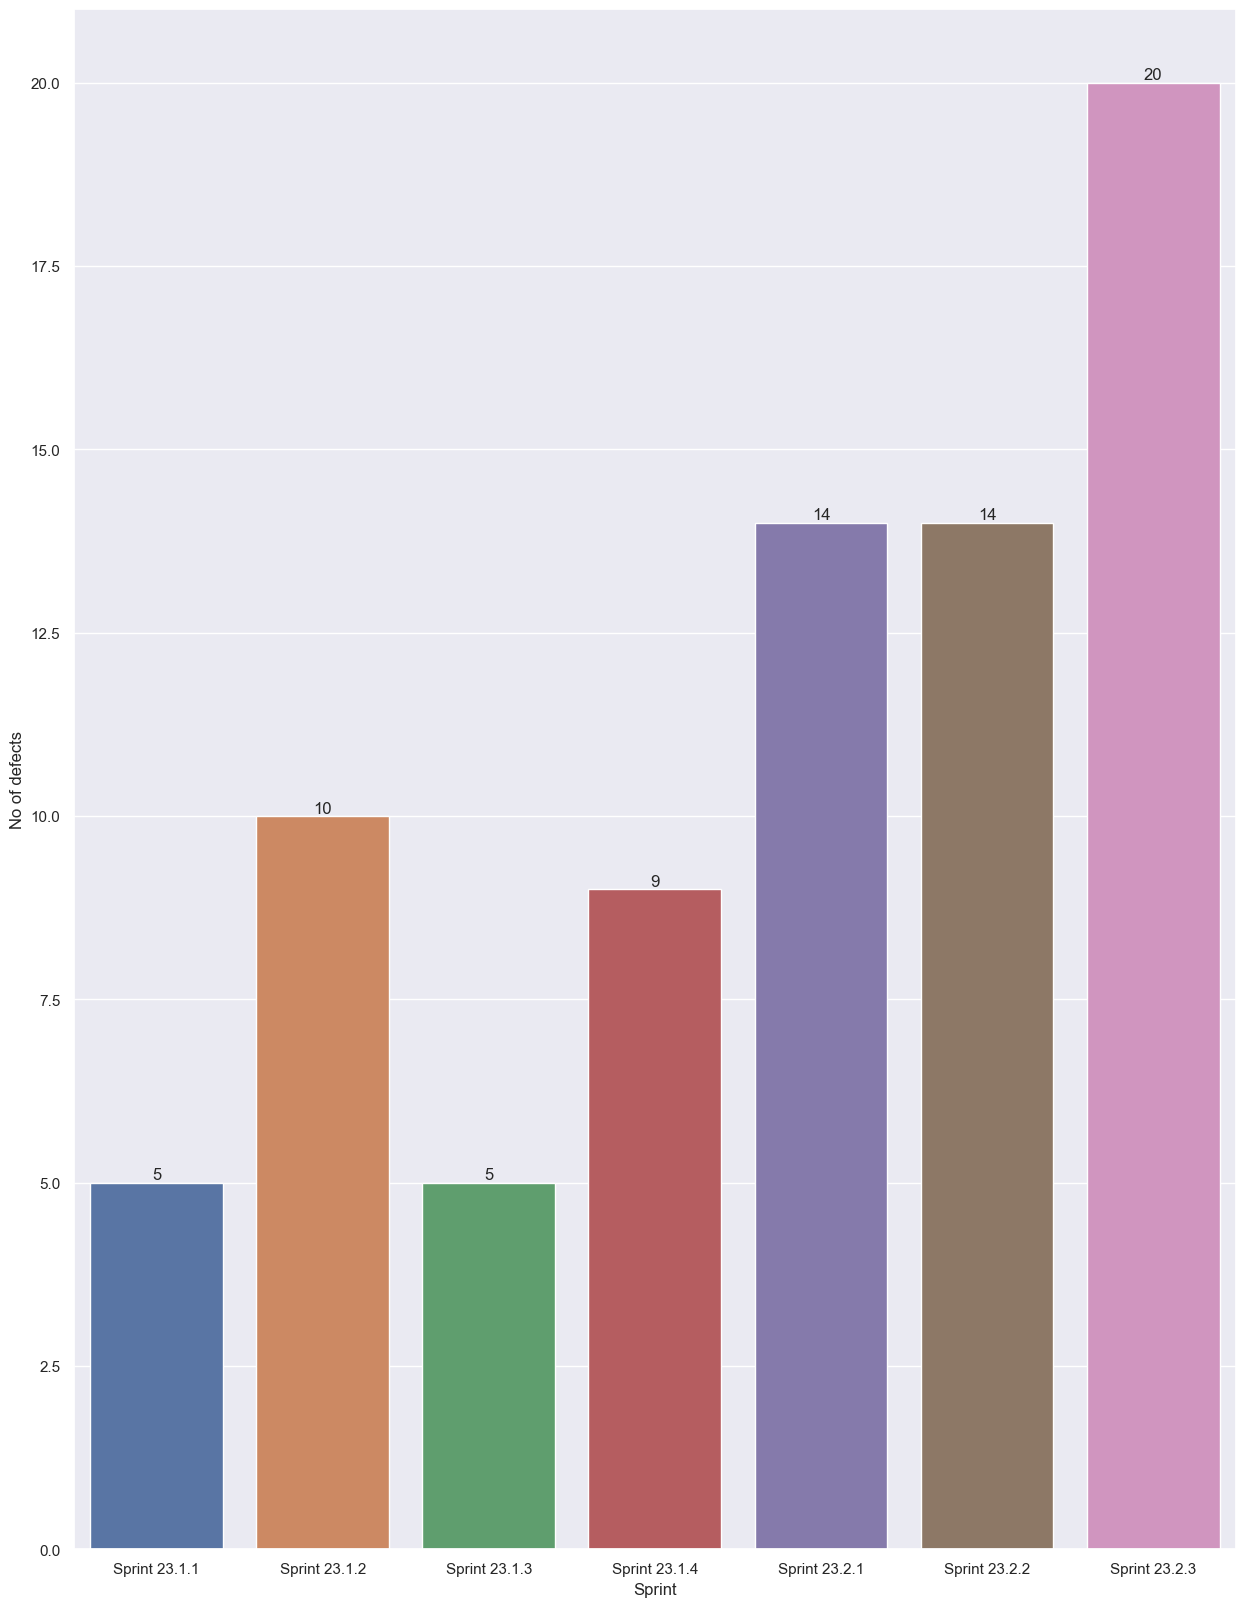

In [6]:
#df_pd=df.select(['Sprint','No of defects']).toPandas()
df_pd=df.toPandas().head(7) #Showing defects for the first 7 sprint for better visiblility
bar_plot = sb.barplot(x='Sprint',y='No of defects', data=df_pd)
sb.set(rc={"figure.figsize":(15,20)})
for bars in bar_plot.containers:
    bar_plot.bar_label(bars)

##### **2. Sprints having more than 10 defects**

In [111]:
df.filter(df['No of defects']>10).show()

+-------------+-------------+----+-----+-----------+---------+-------+----+------+---------+
|       Sprint|No of defects|Open|Ready|In Progress|In Review|Impeded|Done|Closed|Cancelled|
+-------------+-------------+----+-----+-----------+---------+-------+----+------+---------+
|Sprint 23.2.1|           14|   3|    0|          4|        0|      0|   5|     1|        1|
|Sprint 23.2.2|           14|   1|    2|          3|        1|      1|   4|     1|        1|
|Sprint 23.2.3|           20|   4|    0|          5|        5|      0|   3|     2|        1|
|Sprint 23.3.1|           19|   2|    2|          1|        5|      1|   1|     5|        2|
|Sprint 23.3.2|           17|   1|    6|          4|        3|      0|   2|     1|        0|
|Sprint 23.3.3|           12|   1|    0|          1|        0|      0|   2|     8|        0|
|Sprint 23.3.4|           13|   2|    4|          0|        0|      0|   6|     1|        0|
|Sprint 23.4.2|           15|   5|    1|          1|        2|      0|

pd_df=df.filter(df['No of defects']>10).toPandas() #Converting to pandas dataframe so that can visualize #using chart
bar_plot = sb.barplot(x='Sprint', y='No of defects', data=pd_df)
for bars in bar_plot.containers:
    bar_plot.bar_label(bars)

##### **2. Sprints having more than 15 defects**

In [116]:
df.filter(df['No of defects']>15).show()

+-------------+-------------+----+-----+-----------+---------+-------+----+------+---------+
|       Sprint|No of defects|Open|Ready|In Progress|In Review|Impeded|Done|Closed|Cancelled|
+-------------+-------------+----+-----+-----------+---------+-------+----+------+---------+
|Sprint 23.2.3|           20|   4|    0|          5|        5|      0|   3|     2|        1|
|Sprint 23.3.1|           19|   2|    2|          1|        5|      1|   1|     5|        2|
|Sprint 23.3.2|           17|   1|    6|          4|        3|      0|   2|     1|        0|
|Sprint 23.4.4|           24|   4|    6|          6|        2|      2|   2|     2|        0|
+-------------+-------------+----+-----+-----------+---------+-------+----+------+---------+



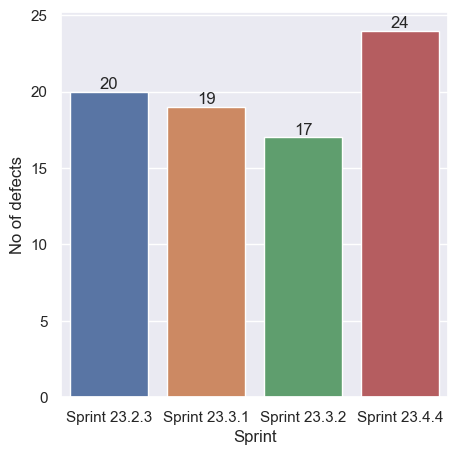

In [119]:
pd_df=df.filter(df['No of defects']>15).toPandas()
bar_plot = sb.barplot(x='Sprint', y='No of defects', data=pd_df)
#sb.set({'figure.figsize':(5,5)})
for bars in bar_plot.containers:
    bar_plot.bar_label(bars)

##### **3. Sprint which reported maximum defects**

In [145]:
df.show()

+-------------+-------------+----+-----+-----------+---------+-------+----+------+---------+
|       Sprint|No of defects|Open|Ready|In Progress|In Review|Impeded|Done|Closed|Cancelled|
+-------------+-------------+----+-----+-----------+---------+-------+----+------+---------+
|Sprint 23.1.1|            5|   2|    0|          1|        0|      0|   1|     1|        0|
|Sprint 23.1.2|           10|   5|    1|          0|        2|      0|   0|     0|        2|
|Sprint 23.1.3|            5|   0|    0|          2|        0|      1|   0|     2|        0|
|Sprint 23.1.4|            9|   0|    2|          3|        0|      3|   0|     0|        1|
|Sprint 23.2.1|           14|   3|    0|          4|        0|      0|   5|     1|        1|
|Sprint 23.2.2|           14|   1|    2|          3|        1|      1|   4|     1|        1|
|Sprint 23.2.3|           20|   4|    0|          5|        5|      0|   3|     2|        1|
|Sprint 23.2.4|            9|   2|    0|          2|        0|      1|

In [41]:
from pyspark.sql.functions import max
# df.select(max(df['No of defects'])).show()
df=df.withColumnRenamed('No of defects','No_of_defects')
df.createOrReplaceTempView("Defects")
spark.sql("select * from Defects where No_of_defects=(select max(No_of_defects) from Defects)").show()

+-------------+-------------+----+-----+-----------+---------+-------+----+------+---------+
|       Sprint|No_of_defects|Open|Ready|In Progress|In Review|Impeded|Done|Closed|Cancelled|
+-------------+-------------+----+-----+-----------+---------+-------+----+------+---------+
|Sprint 23.4.4|           24|   4|    6|          6|        2|      2|   2|     2|        0|
+-------------+-------------+----+-----+-----------+---------+-------+----+------+---------+



##### From above it is evident that maximum defects reported in Sprint 23.4.4

##### **4. Sprints having cancelled defects**

In [7]:
df.show()

+-------------+-------------+----+-----+-----------+---------+-------+----+------+---------+
|       Sprint|No of defects|Open|Ready|In Progress|In Review|Impeded|Done|Closed|Cancelled|
+-------------+-------------+----+-----+-----------+---------+-------+----+------+---------+
|Sprint 23.1.1|            5|   2|    0|          1|        0|      0|   1|     1|        0|
|Sprint 23.1.2|           10|   5|    1|          0|        2|      0|   0|     0|        2|
|Sprint 23.1.3|            5|   0|    0|          2|        0|      1|   0|     2|        0|
|Sprint 23.1.4|            9|   0|    2|          3|        0|      3|   0|     0|        1|
|Sprint 23.2.1|           14|   3|    0|          4|        0|      0|   5|     1|        1|
|Sprint 23.2.2|           14|   1|    2|          3|        1|      1|   4|     1|        1|
|Sprint 23.2.3|           20|   4|    0|          5|        5|      0|   3|     2|        1|
|Sprint 23.2.4|            9|   2|    0|          2|        0|      1|

In [14]:
df.filter(df['Cancelled']>0)['Sprint','Cancelled'].show()

+-------------+---------+
|       Sprint|Cancelled|
+-------------+---------+
|Sprint 23.1.2|        2|
|Sprint 23.1.4|        1|
|Sprint 23.2.1|        1|
|Sprint 23.2.2|        1|
|Sprint 23.2.3|        1|
|Sprint 23.2.4|        1|
|Sprint 23.3.1|        2|
|Sprint 23.4.1|        3|
|Sprint 23.4.2|        1|
+-------------+---------+



<Axes: xlabel='Sprint', ylabel='Cancelled'>

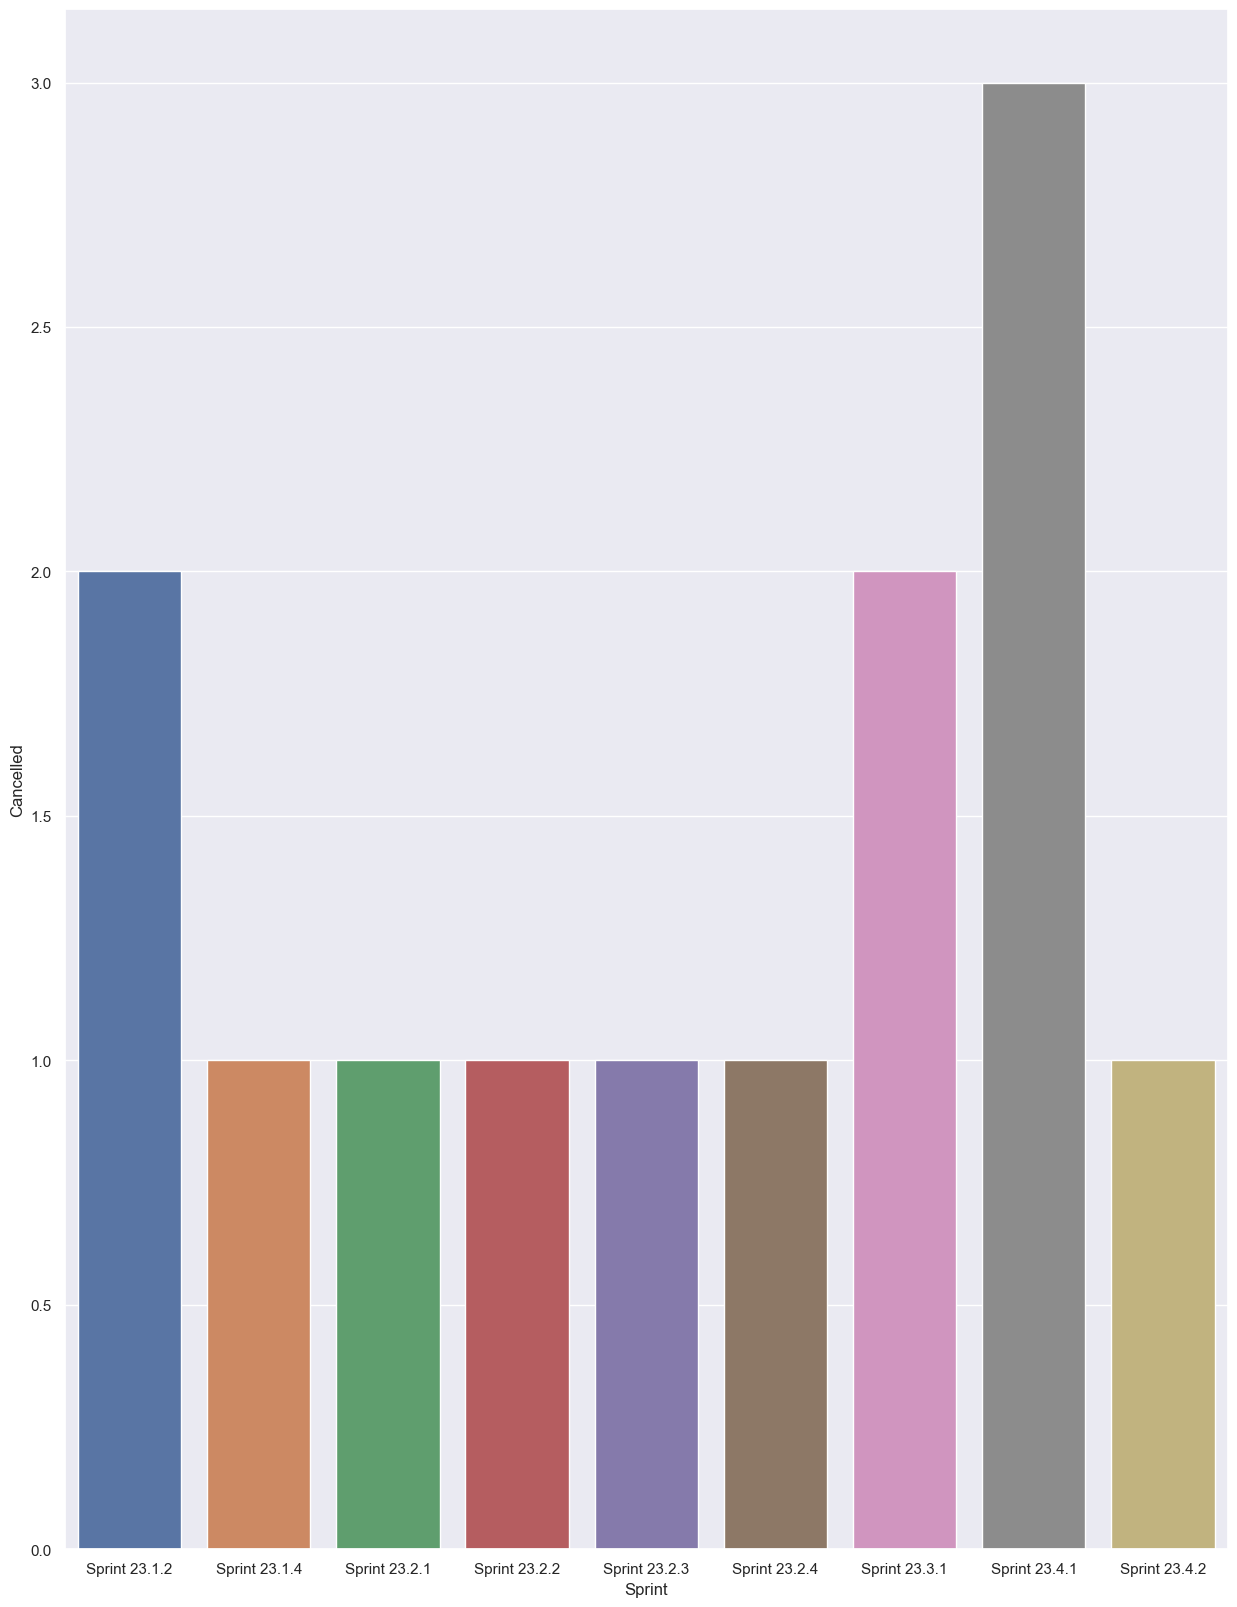

In [20]:
df_cancelled = df.filter(df['Cancelled']>0)['Sprint','Cancelled'].toPandas()
sb.barplot(x='Sprint', y='Cancelled', data=df_cancelled)

##### **5. Sprints having impeded defects**

In [19]:
df.filter(df['Impeded']>0)['Sprint','Impeded'].show()

+-------------+-------+
|       Sprint|Impeded|
+-------------+-------+
|Sprint 23.1.3|      1|
|Sprint 23.1.4|      3|
|Sprint 23.2.2|      1|
|Sprint 23.2.4|      1|
|Sprint 23.3.1|      1|
|Sprint 23.4.4|      2|
+-------------+-------+



<Axes: xlabel='Sprint', ylabel='Impeded'>

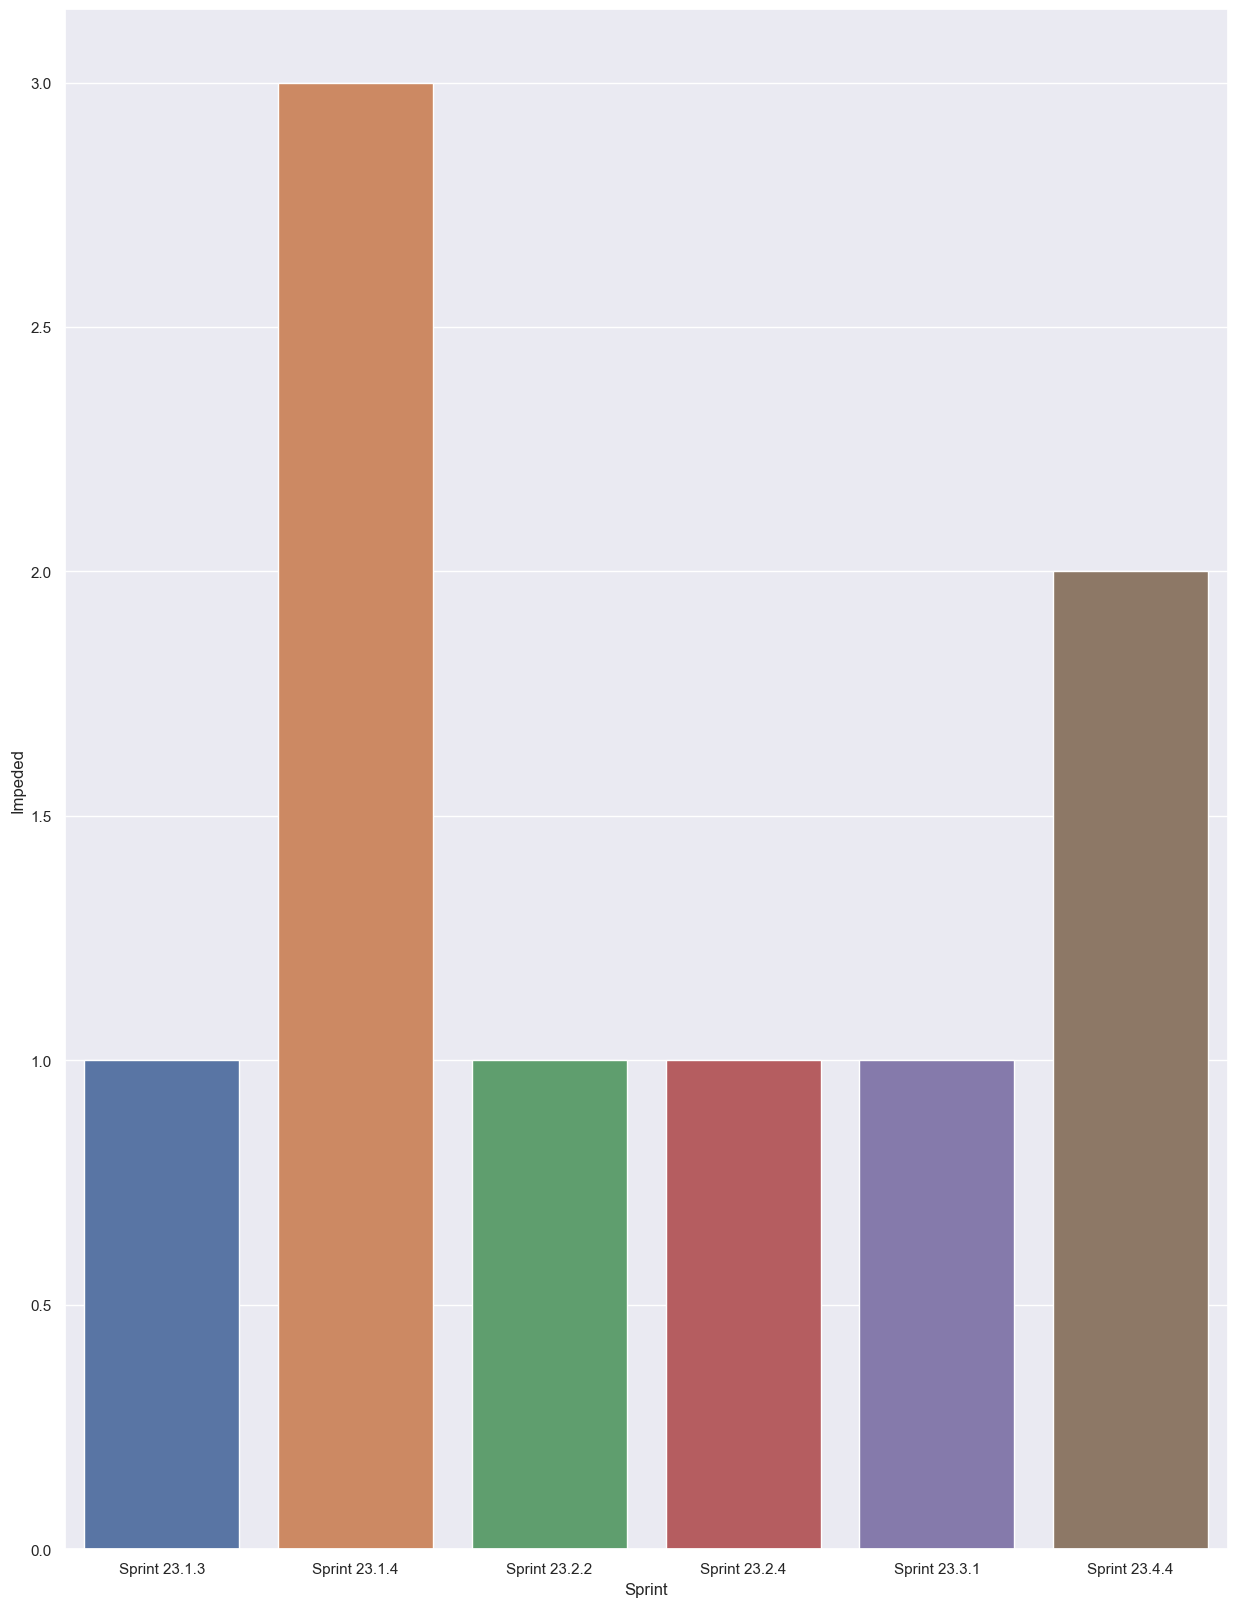

In [22]:
df_impeded = df.filter(df['Impeded']>0)['Sprint','Impeded'].toPandas()
sb.barplot(x='Sprint', y='Impeded', data=df_impeded)

In [76]:
no_of_sprints_having_impeded = df_impeded['Sprint'].count()

In [77]:
no_of_sprints_having_impeded

6

##### From above its seems that Sprint 23.1.4 having maximum impeded defects and there are 6 sprints having impeded defects 

##### **6. Sprints having done and closed defects**

In [38]:
df.filter((df['Done']>0) | (df['Closed']>0))['Sprint','Done','Closed'].show()

+-------------+----+------+
|       Sprint|Done|Closed|
+-------------+----+------+
|Sprint 23.1.1|   1|     1|
|Sprint 23.1.3|   0|     2|
|Sprint 23.2.1|   5|     1|
|Sprint 23.2.2|   4|     1|
|Sprint 23.2.3|   3|     2|
|Sprint 23.2.4|   2|     1|
|Sprint 23.3.1|   1|     5|
|Sprint 23.3.2|   2|     1|
|Sprint 23.3.3|   2|     8|
|Sprint 23.3.4|   6|     1|
|Sprint 23.4.2|   3|     2|
|Sprint 23.4.3|   2|     1|
|Sprint 23.4.4|   2|     2|
+-------------+----+------+



<Axes: xlabel='Sprint', ylabel='Done_and_Closed'>

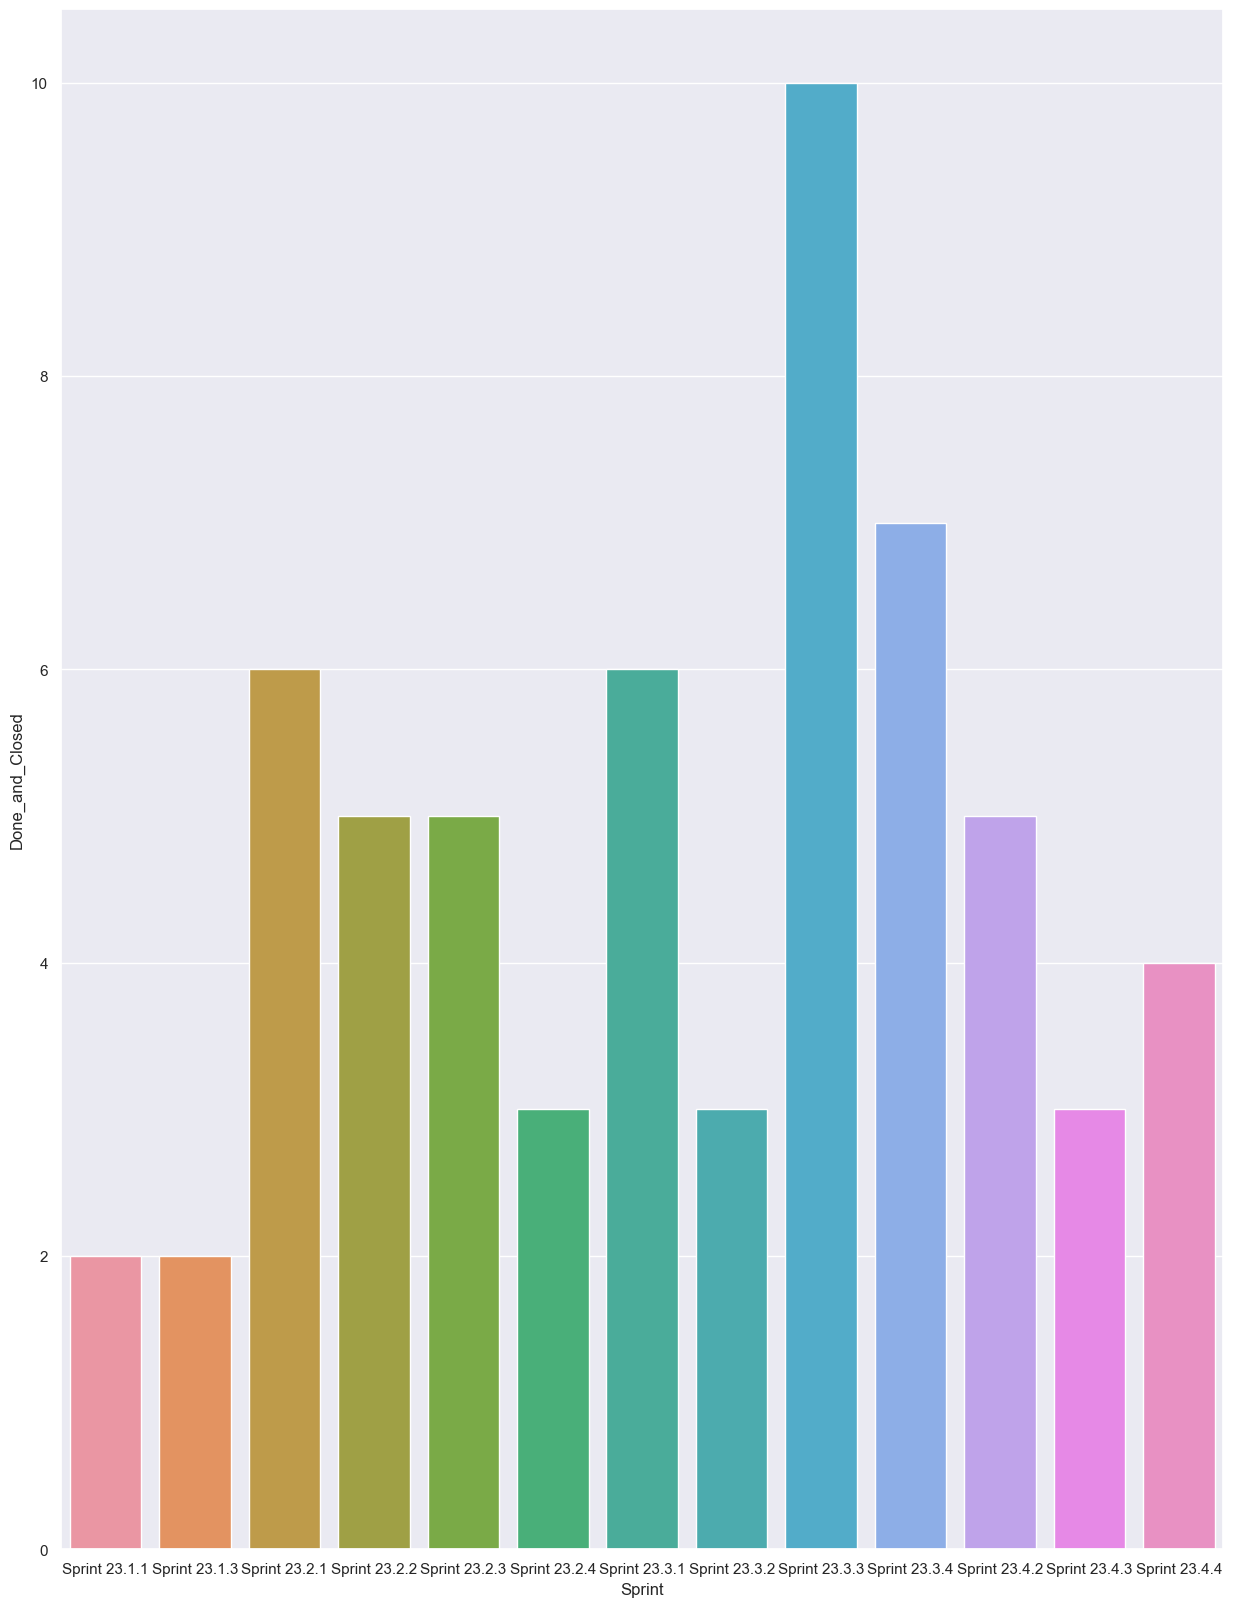

In [46]:
df_done_closed = df.filter((df['Done']>0) | (df['Closed']>0))['Sprint','Done','Closed']
df_done_closed = df_done_closed.withColumn('Done_and_Closed', df['Done']+df['Closed']).toPandas()
sb.barplot(x='Sprint', y='Done_and_Closed', data=df_done_closed)

##### From the above graph it is evident that maximum defects resolved in Sprint 23.3.3

In [70]:
df_open = df.filter(df['Open']>0)['Sprint','Open'].toPandas()
df_open['Open'].sum()

36

<Axes: xlabel='Sprint', ylabel='Open'>

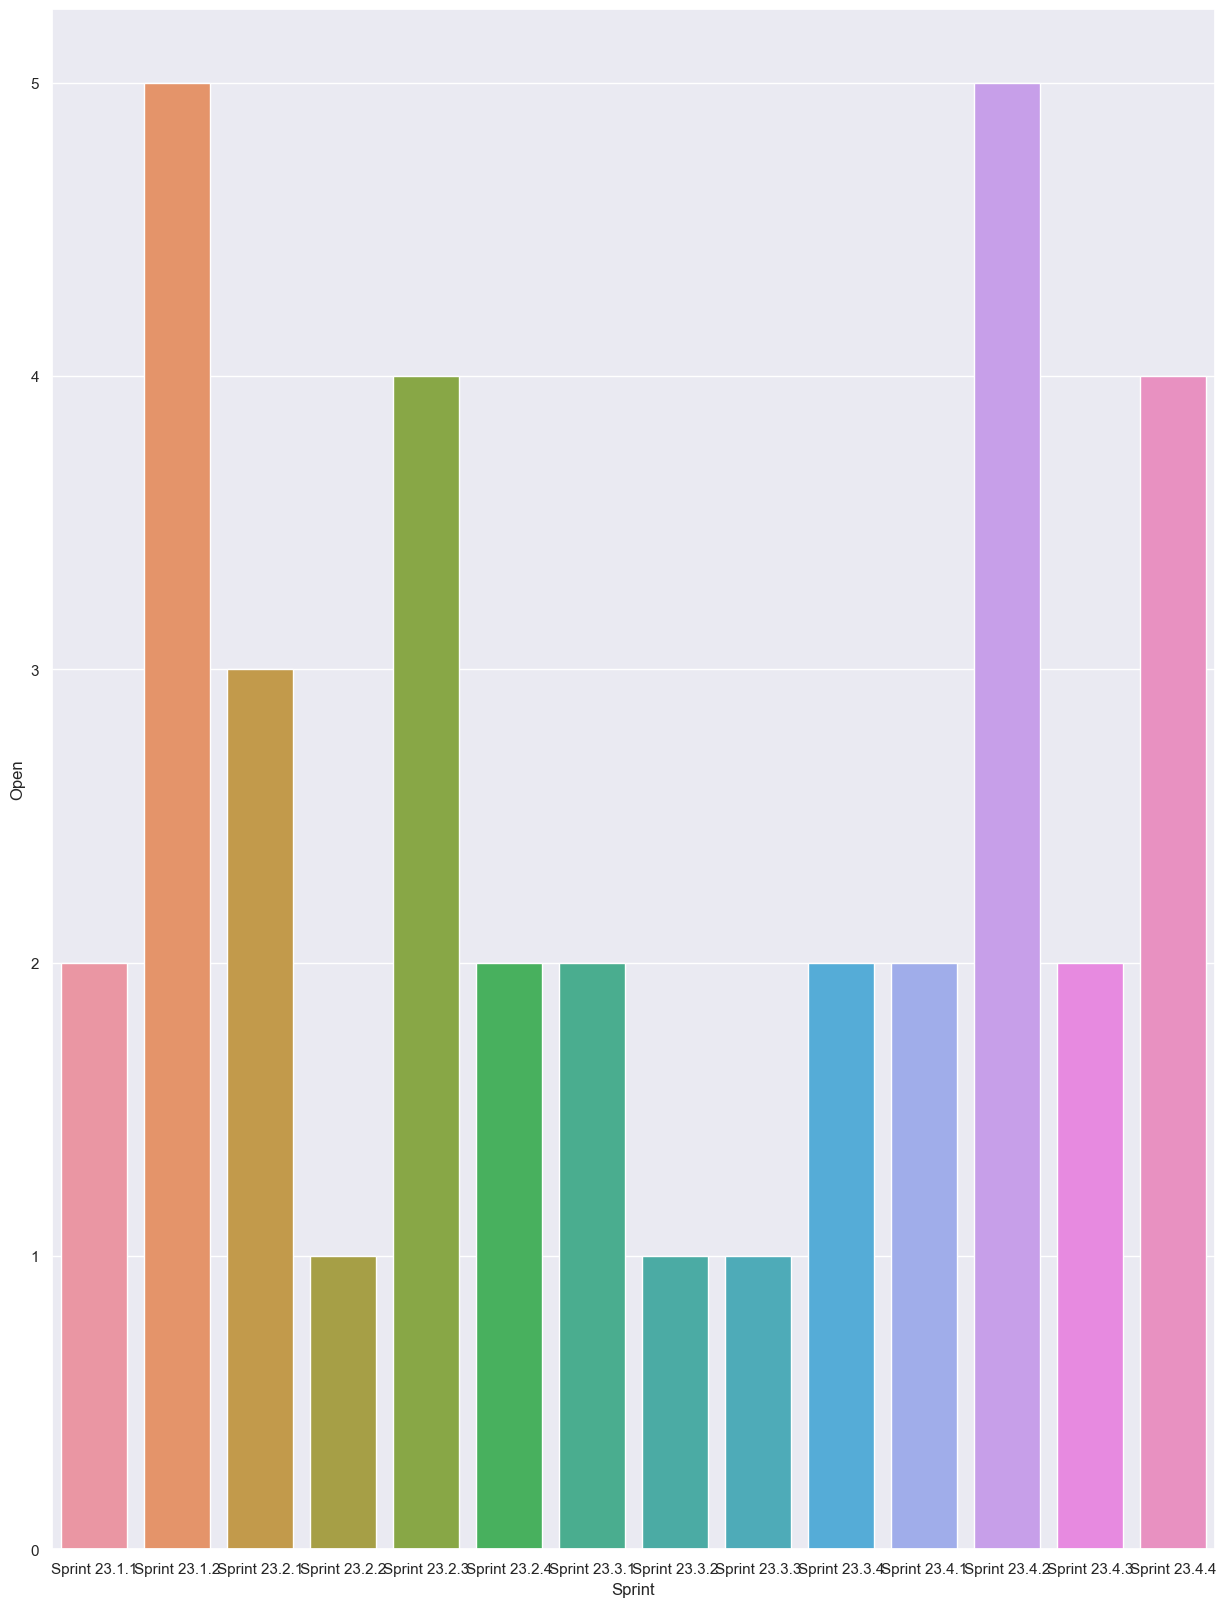

In [78]:
sb.barplot(x='Sprint', y='Open', data=df_open)

##### **Conclusion:** Maximum defects reported in the Sprint 23.4.4, maximum defects cancelled in the Sprint 23.4.1, maximum defects were impeded in the Sprint 23.1.4 and Sprint 23.3.3 having maximum defects resolved and closed. Most of the defects are from Sprint 23.1.2 and Sprint 23.4.2 which are still open, after this Sprint 23.2.3 and Sprint 23.4.4 having most of the defects in Open stage.

##### **So Developer performed well for Sprint 23.3.3 since they have resolved most of the defects reported by testers and Developer should take defects from Sprint 23.1.2 and Sprint 23.4.2 on 1st priority and  defects from Sprint 23.2.3 and Sprint 23.4.4 should be taken on 2nd priority since most of the defect are in Open stage from these sprints**.